<a href="https://colab.research.google.com/github/falanga/jordana-move-audio/blob/main/Falanga_Split_Data_UASpeech_RandomForest_KNN_NaiveBayes_librosa_feature_MFCC_n_mfcc%3D13_100_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/amlanpraharaj/random-forest-using-mfcc-features/notebook

https://www.kaggle.com/code/anmour/svm-using-mfcc-features/notebook

https://www.kaggle.com/code/ilyamich/mfcc-implementation-and-tutorial

# Bibliotecas

In [86]:
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report,mean_squared_error,accuracy_score, plot_confusion_matrix, confusion_matrix 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 


# Extração dos Arquivos de Áudio (Apenas se fizer novamente)

---



In [ ]:
# Trabalhando com o github, agora
import time as tm ###

print("⚙️ Construindo acesso ao diretório")
from google.colab import drive
drive.mount('/content/drive', True)

start = tm.time()
!unzip -q "/content/drive/MyDrive/mini_UASpeech_50_words.zip" -d "uaspeech" 

end = tm.time()
print("✅ Concluído extração dos arquivos. Execução: {} segundos.".format(round(end-start,2)))  

⚙️ Construindo acesso ao diretório
Mounted at /content/drive
replace uaspeech/up/CF02_B1_CW51_M2.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
✅ Concluído extração dos arquivos. Execução: 38.36 segundos.


# Criar base de dados para Treinamento e Testes (Apenas se fizer novamente)

In [ ]:
from scipy.stats import skew

# Generate mfcc features with mean and standard deviation
def get_mfcc(nome_do_audio):
    data, SAMPLE_RATE = librosa.load(nome_do_audio)

    try:
        ft1 = librosa.feature.mfcc(data, sr = SAMPLE_RATE, n_mfcc=13)
        # ft2 = librosa.feature.zero_crossing_rate(data)[0]
        # ft3 = librosa.feature.spectral_rolloff(data)[0]
        # ft4 = librosa.feature.spectral_centroid(data)[0]
        # ft5 = librosa.feature.spectral_contrast(data)[0]
        # ft6 = librosa.feature.spectral_bandwidth(data)[0]
        ft1_trunc = np.hstack((np.mean(ft1, axis=1), np.std(ft1, axis=1), skew(ft1, axis = 1), np.max(ft1, axis = 1), np.median(ft1, axis = 1), np.min(ft1, axis = 1)))
        # ft2_trunc = np.hstack((np.mean(ft2), np.std(ft2), skew(ft2), np.max(ft2), np.median(ft2), np.min(ft2)))
        # ft3_trunc = np.hstack((np.mean(ft3), np.std(ft3), skew(ft3), np.max(ft3), np.median(ft3), np.min(ft3)))
        # ft4_trunc = np.hstack((np.mean(ft4), np.std(ft4), skew(ft4), np.max(ft4), np.median(ft4), np.min(ft4)))
        # ft5_trunc = np.hstack((np.mean(ft5), np.std(ft5), skew(ft5), np.max(ft5), np.median(ft5), np.min(ft5)))
        # ft6_trunc = np.hstack((np.mean(ft6), np.std(ft6), skew(ft6), np.max(ft6), np.median(ft6), np.max(ft6)))
        # return pd.Series(np.hstack((ft1_trunc, ft2_trunc, ft3_trunc, ft4_trunc, ft5_trunc, ft6_trunc)))
        return pd.Series(np.hstack((ft1_trunc)))

    except:
        print('bad file')
        return pd.Series([0]*210)

In [ ]:
# Função para identificar a inteligibilidade dos áudios

def get_inteligibilidade(nome_do_audio):
  very_low_list = ['M01', 'M04', 'M12', 'F03']
  low_list = ['M06', 'M07', 'F02', 'M16']
  mid_list = ['M05', 'F04', 'M11']
  high_list = ['M08', 'M09', 'M10', 'F04', 'M14']

  nome = nome_do_audio.split(os.sep)[-1]
  inteligibilidade = nome.split('_')[0]
  if inteligibilidade in very_low_list:
    return 'very_low'
  if inteligibilidade in low_list:
    return 'low'
  if inteligibilidade in mid_list:
    return 'mid'
  if inteligibilidade in high_list:
    return 'high'
  return 'control'


In [ ]:
# Gera dados de treinamento, palavra por palavra
import os
import time as tm ###
import librosa

import glob
import numpy as np
from IPython.display import Audio
from sklearn.model_selection import train_test_split ###

import pandas as pd
from tqdm.notebook import tqdm
tqdm.pandas()

import librosa.display as ld
from tqdm import tqdm

from google.colab import drive
drive.mount('/content/drive', True)

# Definição de variáveis
dir_de_sons = '/content/drive/MyDrive/Jordana/juntos/'

print("⚙️ Extração MFCC para as palavras")
start = tm.time()

# preenche a lista de nomes dos arquivos
labels_list = []
for name in glob.glob(str(dir_de_sons) + '/*'):
  labels_list.append(name.split(os.sep)[-1])


# labels_list é a lista de palavras
speech_labels_list = []
speech_inteligibilidade_list = []
speech_data_list = []

for label in labels_list:
  # label é a palavras sendo dita
  i = 0
  for name in glob.glob(str(dir_de_sons) + label + '/*'):
    speech_data_list.append(name)
    speech_labels_list.append(label)
    speech_inteligibilidade_list.append(get_inteligibilidade(name))
    # i += 1
    # if i == 300:
    #   break

data = pd.DataFrame()
data['fname'] = speech_data_list

data = data['fname'].progress_apply(get_mfcc)
data['fname'] = speech_data_list
data['label'] = speech_labels_list
data['inteligibilidade'] = speech_inteligibilidade_list


Mounted at /content/drive
⚙️ Extração MFCC para as palavras


  0%|          | 0/751 [00:00<?, ?it/s]

In [ ]:
#Salvar dados de treinamento
from google.colab import drive
diretorio_google = '/content/drive'
drive.mount(diretorio_google, True)

from pathlib import Path  
filepath = Path(diretorio_google + "/MyDrive/Jordana" + "/inteligibilidade.csv")  
start = tm.time()

filepath.parent.mkdir(parents=True, exist_ok=True)  
data.to_csv(filepath)

end = tm.time()
print("✅ Concluído avaliação das palavras. Execução: {} segundos.".format(round(end-start,2)))  

# Audio(data = wave_carregado[0], rate = wave_carregado[1])

Mounted at /content/drive
✅ Concluído avaliação das palavras. Execução: 0.09 segundos.



# Gerar dados de treinamento e teste 

In [18]:
# LER DADOS PARA UTILIZAÇÃO EM TREINAMENTO E TESTE
import os
import time as tm ###
import pandas as pd

def ler_dados():
  from google.colab import drive
  diretorio_google = '/content/drive'
  drive.mount(diretorio_google, True)

  from pathlib import Path  
  filepath = Path(diretorio_google + "/MyDrive/Jordana" + "/inteligibilidade.csv")  

  filepath.parent.mkdir(parents=True, exist_ok=True)  
  data = pd.read_csv(filepath)
  return data


# Retornar as falas de acordo com as inteligibilidades e iterar para cada inteligibilidade executando train e test
data = ler_dados()


Mounted at /content/drive


In [287]:
from pandas.core.arrays.categorical import pd_array
# Função para separar dados de teste e de treinamento especial para excluir alguns itens
import random

def random_unique(lista, quantidade):
  retorno = []

  if quantidade < len(lista):
    while len(retorno)<quantidade:
      escolhido = random.choice(lista)
      if escolhido not in retorno:
        retorno.append(escolhido)
    return retorno
  return lista

def drop_others(lista, preserve_list):
  retorno = lista
  todos = list(range(len(lista)))
  todos = list(set(todos) - set(preserve_list))
  for i in todos:
    retorno = retorno.drop(i)
  print("Tamanho de retorno ", len(retorno))
  return retorno


def train_test_split_dysarthric(X, inteligibilidades, test_size=0.3):
  falas_por_inteligibilidade = {}
  falas_por_inteligibilidade_train = {}
  falas_por_inteligibilidade_test = {}

  falas_por_inteligibilidade_train = []

  # Cria o dicionário com as inteligibilidades
  for inteligibilidade in inteligibilidades:
    falas_por_inteligibilidade[inteligibilidades[inteligibilidade]] = []
    falas_por_inteligibilidade_test[inteligibilidades[inteligibilidade]] = []

  # Cria os índices para cada fala de acordo com sua inteligibilidade
  i = range(len(X))
  for index in i:
     inteligibilidade_da_fala = X.iloc[index]['inteligibilidade']
     if inteligibilidade_da_fala in inteligibilidades:
        indice_da_inteligibilidade_da_fala = inteligibilidade_list[inteligibilidade_da_fala]
        falas_por_inteligibilidade[indice_da_inteligibilidade_da_fala].append(index)

  # Define os testes para cada inteligibilidade de acordo com o parâmetro passado
  for inteligibilidade_indice in inteligibilidades:
    indice = inteligibilidades[inteligibilidade_indice]
    # Define a quantidade de testes para a inteligibilidade
    n_test = (int) (len(falas_por_inteligibilidade[indice]) * test_size)
    print("Vamos fazer ", n_test, " testes para a inteligibilidade ", inteligibilidade_indice)
    # Recupera indices sorteados para teste pra a inteligibilidade atual
    falas_por_inteligibilidade_test[indice] = random_unique(falas_por_inteligibilidade[indice], n_test)

  # Seleciona as falas que serão utilizadas para teste para separar as de treinamento
  falas_para_teste = []
  i = range(len(falas_por_inteligibilidade_test))
  for index in i:
    falas_para_teste = falas_para_teste + falas_por_inteligibilidade_test[index]
  # As falas para treino são aquelas não utilizadas para testes
  falas_para_treino = list(set(range(len(X))) - set(falas_para_teste))

  print("Decidindo os treinos para um total de testes = ", len(falas_para_teste))
  ret_falas_para_treino = drop_others(X, falas_para_treino)
  ret_falas_para_treino = ret_falas_para_treino.drop('inteligibilidade', axis=1)

  ret_falas_para_teste = []
  
  for inteligibilidade_indice in inteligibilidades:
    indice = inteligibilidades[inteligibilidade_indice]
    print("Decidindo os testes")
    todos = list(range(len(X)))
    lista_de_teste = drop_others(X, falas_por_inteligibilidade_test[indice])
    ret_falas_para_teste.append(lista_de_teste.drop('inteligibilidade', axis=1))

  y_train = pd.DataFrame(ret_falas_para_treino, columns = ['label'])

  y_train = y_train.squeeze()

  y_test = []

  for i in range(len(ret_falas_para_teste)):
    y_ = pd.DataFrame(ret_falas_para_treino, columns = ['label'])
    y_test.append(y_.squeeze())

  return ret_falas_para_treino, ret_falas_para_teste, y_train, y_test




In [313]:
#Recupera os dados de treinamento e teste:
inteligibilidade_list = {'very_low':0, 'low':1,'mid':2,'high':3, 'control': 4}

X_train, X_test_ret, y_train, y_test_ret  = train_test_split_dysarthric(data, inteligibilidade_list)

for i in range(len(X_test_ret) - 1):
  X_test_ret[i]['label'] = np.zeros((len(X_test_ret[i])))


Vamos fazer  26  testes para a inteligibilidade  very_low
Vamos fazer  24  testes para a inteligibilidade  low
Vamos fazer  24  testes para a inteligibilidade  mid
Vamos fazer  33  testes para a inteligibilidade  high
Vamos fazer  117  testes para a inteligibilidade  control
Decidindo os treinos para um total de testes =  224
Tamanho de retorno  527
Decidindo os testes
Tamanho de retorno  26
Decidindo os testes
Tamanho de retorno  24
Decidindo os testes
Tamanho de retorno  24
Decidindo os testes
Tamanho de retorno  33
Decidindo os testes
Tamanho de retorno  117


In [302]:
print(len(X_test_ret))

5


# Treinamento (executar a partir daqui)

In [308]:
#Ler dados de Treinamento
from google.colab import drive
diretorio_google = '/content/drive'
drive.mount(diretorio_google, True)

import time as tm ###
start = tm.time()

import numpy as np
import pandas as pd

from pathlib import Path  
# filepath = Path(diretorio_google + "/MyDrive" + "/data2.csv")  
filepath = Path(diretorio_google + "/MyDrive/Jordana" + "/inteligibilidade.csv")  
dados_salvos = pd.read_csv(filepath)
speech_labels_list = dados_salvos['label']

dados_salvos=dados_salvos.drop('inteligibilidade', axis=1)

# Separar dados de treinamento
from sklearn.model_selection import train_test_split ###
X_train, X_test_ret, y_train, y_test_ret = train_test_split(dados_salvos, speech_labels_list, test_size=0.3)

X_test_ret['label'] = np.zeros((len(X_test_ret)))

end = tm.time()
print("✅ Concluído. Execução: {} segundos.".format(round(end-start,2)))  

Mounted at /content/drive
✅ Concluído. Execução: 0.04 segundos.


In [314]:
X_train.tail()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,70,71,72,73,74,75,76,77,fname,label
744,744,-342.21634,103.118256,-32.034798,31.508204,-26.960120,21.624285,-14.295318,18.366962,4.921861,...,-4.390741,-52.136360,-7.237365,-5.938862,-23.475224,-26.725098,-28.483260,-7.164772,/content/drive/MyDrive/Jordana/juntos/a/M05_B3...,a
745,745,-320.30740,111.870674,-33.282980,32.111020,-31.721632,21.513186,-12.900796,23.343113,-3.851634,...,-2.428575,-32.988663,5.048239,-20.807556,-35.320652,-8.792236,-27.885366,-18.021820,/content/drive/MyDrive/Jordana/juntos/a/M05_B1...,a
747,747,-282.70816,137.224140,-13.517100,62.008360,-31.384743,36.971584,-14.460683,24.711863,-7.233627,...,18.557720,-22.666096,9.553468,-23.883896,-20.608837,-3.434452,-19.206675,-2.695546,/content/drive/MyDrive/Jordana/juntos/a/M05_B2...,a
748,748,-295.22906,122.403860,-27.491562,42.207798,-28.987932,30.595243,-14.846083,20.106537,-6.624862,...,11.937496,-30.927200,7.464661,-17.810600,-22.318950,-4.564455,-33.035950,-15.082739,/content/drive/MyDrive/Jordana/juntos/a/M05_B1...,a
749,749,-248.92378,129.989880,-19.176683,50.559284,-32.632970,30.802230,-16.070350,21.790161,-5.827992,...,10.387720,-27.499092,5.213653,-29.599200,-14.010508,-1.652589,-24.426819,-9.859703,/content/drive/MyDrive/Jordana/juntos/a/M05_B2...,a


In [309]:
# Functions from Random Foresth using MFCC ttps://www.kaggle.com/amlanpraharaj/random-forest-using-mfcc-features
# Construct features set
X = X_train.drop(['label', 'fname'], axis=1)
feature_names = list(X.columns)
X = X.values
labels = np.sort(np.unique(X_train.label.values))
num_class = len(labels)
c2i = {}
i2c = {}
for i, c in enumerate(labels):
    c2i[c] = i
    i2c[i] = c
y = np.array([c2i[x] for x in X_train.label.values])

In [310]:
print(labels)

['a' 'abbreviated']


In [ ]:
X_test = X_test_ret.drop(['label', 'fname'], axis=1)
X_test = X_test.values
print(X.shape)
print(X_test.shape)

(28316, 79)
(12136, 79)


# Divisão dos dados

In [305]:
##Divisão dos dados
X_val = X_test_ret
y_val = y_test_ret

# Modelo Random Forest

In [307]:
#fitting random forest on the dataset
import time as tm ###
start = tm.time()

rfc = RandomForestClassifier(n_estimators = 150)
rfc.fit(X_train, y_train)
def proba2labels(preds, i2c, k=3):
    ans = []
    ids = []
    for p in preds:
        idx = np.argsort(p)[::-1]
        ids.append([i for i in idx[:k]])
        ans.append(' '.join([i2c[i] for i in idx[:k]]))

    return ans, ids
#checking the accuracy of the model
print(rfc.score(X_val, y_val))

end = tm.time()
print("✅ Concluído. Execução: {} segundos.".format(round(end-start,2)))

ValueError: ignored

## GridSearch - Random Forest

In [ ]:
import time as tm ###
start = tm.time()

#RandomForest
# parametros = {'criterion': ['gini', 'entropy'],
#               'n_estimators': [10, 40, 100, 150, 200],
#               'min_samples_split': [2, 5, 10],
#               'min_samples_leaf': [1, 2, 10],
#               'max_depth':[2,3,4,5]}

parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [100, 150, 200],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2],
              'max_depth':[3,4,5]}

grid = GridSearchCV(RandomForestClassifier(), parametros, n_jobs=-1, cv=3)
grid.fit(X_train, y_train)

# Find the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

end = tm.time()
print("✅ Concluído. Execução: {} segundos.".format(round(end-start,2)))

0.44246001715352407
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=200)
✅ Concluído. Execução: 7050.68 segundos.


In [ ]:
## tempo gasto "GridSearch - Random Forest" = 3h17m

### Salvar os melhores parâmetros do Random Forest


In [ ]:
###Salvar os melhores parâmetros do Random Forest
import time as tm ###
start = tm.time()

import pandas as pd

data_best_params = pd.DataFrame()
# diction = grid.best_params_
# diction = {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
diction = {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

data_best_params = data_best_params.append( diction, ignore_index=True)

#Salvar dados de treinamento
from google.colab import drive
diretorio_google = '/content/drive'
drive.mount(diretorio_google, True)

from pathlib import Path  
filepath = Path(diretorio_google + "/MyDrive" + "/best_params_100_words_knn_RF.csv")  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data_best_params.to_csv(filepath)

end = tm.time()
print("✅ Concluído. Execução: {} segundos.".format(round(end-start,2)))  

Mounted at /content/drive
✅ Concluído. Execução: 7.73 segundos.


In [ ]:
# print(diction['criterion'])
data_best_params.head()

,criterion,max_depth,min_samples_leaf,min_samples_split,n_estimators
0,entropy,5.0,2.0,2.0,200.0


## Treinando o modelo Random Forest - Classificador

In [ ]:
# Optimal model - Random Forest
import time as tm ###
start = tm.time()

print('\n✅ Construção do Modelo.')
# clf_rf = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'],
#                                 criterion=grid.best_params_['criterion'], 
#                                 min_samples_leaf=grid.best_params_['min_samples_leaf'], 
#                                 min_samples_split=grid.best_params_['min_samples_split'], n_jobs=-1)

clf_rf = RandomForestClassifier(n_estimators=diction['n_estimators'], 
                                # max_depth=diction['max_depth'], 
                                criterion=diction['criterion'], 
                                min_samples_leaf=diction['min_samples_leaf'], 
                                min_samples_split=diction['min_samples_split'], n_jobs=-1)

print('✅ Treinamento do Modelo.')
clf_rf.fit(X_train, y_train)
print(accuracy_score(clf_rf.predict(X_val), y_val))

end = tm.time()
print("✅ Concluído. Execução: {} segundos.".format(round(end-start,2))) 


✅ Construção do Modelo.
✅ Treinamento do Modelo.
0.9216009417304296
✅ Concluído. Execução: 196.21 segundos.


In [ ]:
print(X_train)

[[ 1.28700000e+03 -2.54589860e+02  1.11919430e+02 ... -1.28230780e+01
  -1.71648860e+01 -2.24947430e+01]
 [ 1.28270000e+04 -2.88726380e+02  8.43171300e+01 ... -2.36653370e+01
  -1.74359680e+01 -1.93808500e+01]
 [ 7.64700000e+03 -3.08790650e+02  1.05422280e+02 ... -1.58033540e+01
  -1.29594560e+01 -1.96682780e+01]
 ...
 [ 2.94550000e+04 -2.46440640e+02  1.29354430e+02 ... -1.38454880e+01
  -9.68231700e+00 -1.56617400e+01]
 [ 6.62700000e+03 -2.95329650e+02  1.03679500e+02 ... -1.51798670e+01
  -1.08262580e+01 -1.59888320e+01]
 [ 1.75130000e+04 -2.72506470e+02  1.14970850e+02 ... -1.56421770e+01
  -1.50060005e+01 -1.72643740e+01]]


# Modelo KNN

## GridSearch - KNN

In [306]:
#KNN
import time as tm ###
start = tm.time()

# parametros = {'n_neighbors': [3, 5, 10, 20],
parametros = {'n_neighbors': range(1, 50),               
              'p': [1, 2]}

grid_knn = GridSearchCV(KNeighborsClassifier(), parametros, n_jobs=-1, cv=3)
grid_knn.fit(X_train, y_train)

# Find the best model
print(grid_knn.best_score_)
print(grid_knn.best_params_)
print(grid_knn.best_estimator_)

end = tm.time()
print("✅ Concluído. Execução: {} segundos.".format(round(end-start,2)))  

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
294 fits failed out of a total of 294.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
98 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 400, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr", multi_output=True)
  File "/usr/lo

ValueError: ignored

## Recall or Sensitivity - KNN

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

from sklearn.metrics import make_scorer

rec = 0

for i in range(100):
  palavraaserverificada = (y_train == i)
  recall = cross_val_score(grid_knn, X_train, palavraaserverificada, 
                            cv=3, scoring="recall").mean()
  rec += recall
  # print(rec)

recall_avg = rec/100

print(recall_avg)


0.9726455578899347


In [ ]:
## Tempo recall = 3h

## Precision - KNN

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

from sklearn.metrics import make_scorer

prec = 0

for i in range(100):
  palavraaserverificada = (y_train == i)
  precision = cross_val_score(grid_knn, X_train, palavraaserverificada, 
                            cv=3, scoring="precision").mean()
  prec += precision
  print(prec)

precision_avg = prec/100

print(precision_avg)


0.9863215488215488
1.975332537832538
2.968459685598861
3.96487545620818
4.961171752504476
5.95436903141604
6.95082293212526
7.938477253112914
8.86792425772121
9.822688810928478
10.822688810928478
11.800083446943804
12.781481699128573
13.770370588017462
14.760269577916452
15.722075133472007
16.722075133472007
17.708741800138675
18.67933003543279
19.667835782559226
20.63782984078858
21.61762782058656
22.595380879540954
23.55779918019455
24.518475063451078
25.487225063451078
26.471584388576478
27.46770841958423
28.444978211654487
29.444978211654487
30.386995018377174
31.37550076550361
32.29890143890428
33.28779032779317
34.27629607491961
35.2725923712159
36.23705428919308
37.23003596768008
38.22652719575026
39.193122023336464
40.109975431366344
41.10646665943652
42.09559709421913
43.09559709421913
44.06523656290983
45.0103210483169
45.99125786748901
46.98372467034907
47.91920854131681
48.85795080263972
49.85407483364747
50.84658325115589
51.8121004925352
52.80500829395364
53.7864481607867

In [ ]:
# Tempo precision = 3h

## Treinando o modelo KNN - Classificador

In [ ]:
# Optimal model - KNN
import time as tm ###
start = tm.time()

print('\n✅ Construção do Modelo.')
clf_knn = KNeighborsClassifier(n_neighbors=grid_knn.best_params_['n_neighbors'], p=grid_knn.best_params_['p'])
print('✅ Treinamento do Modelo.')
clf_knn.fit(X_train, y_train)
print(accuracy_score(clf_knn.predict(X_val), y_val))

end = tm.time()
print("✅ Concluído. Execução: {} segundos.".format(round(end-start,2)))  


✅ Construção do Modelo.
✅ Treinamento do Modelo.
0.9859917598587404
✅ Concluído. Execução: 3.43 segundos.


# Modelo Naive Bayes

## Treinando o modelo Naive Bayes - Classificador

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

print('\n✅ Construção do Modelo.')
gnb = GaussianNB()

print('✅ Treinamento do Modelo.')
gnb.fit(X_train, y_train)
print(accuracy_score(gnb.predict(X_val), y_val))


✅ Construção do Modelo.
✅ Treinamento do Modelo.
0.9160682754561507


## Desconsidere o que está abaixo!!

# Cross Validation Parameters

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

### Modelo KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

steps4 = [('scaler', StandardScaler()),('KNN', KNeighborsClassifier())]       
pipeline_knn = Pipeline(steps4)
knn = pipeline_knn.fit(X_train, y_train)
print('Accuracy with Scaling: {}'.format(knn.score(X_test, y_test)))

Accuracy with Scaling: 0.8900523560209425


In [ ]:
knn_train_acc = float(knn.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % knn_train_acc)

knn_test_acc = float(knn.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % knn_train_acc)

----train accuracy score 95.73033707865169 ----
----test accuracy score 95.73033707865169 ----


In [ ]:
knn_res = cross_val_score(knn, X, y, cv=cv, n_jobs=-1)
print(knn_res)
print("Average:", np.average(knn_res))

[0.91764706 0.89803922 0.88976378 0.91338583 0.90551181 0.94901961
 0.8627451  0.88976378 0.9015748  0.88188976 0.91764706 0.91764706
 0.92125984 0.89370079 0.92125984 0.89019608 0.89019608 0.91338583
 0.90944882 0.90551181 0.91764706 0.8627451  0.90944882 0.84251969
 0.91338583 0.86666667 0.92156863 0.87007874 0.86614173 0.90551181
 0.92156863 0.90588235 0.88976378 0.89370079 0.88188976 0.90980392
 0.89803922 0.92913386 0.85433071 0.86614173 0.89803922 0.94117647
 0.88582677 0.85826772 0.92519685 0.89803922 0.88235294 0.92519685
 0.91732283 0.89370079]
Average: 0.8988136482939634


In [ ]:
knn_pred = knn.predict(X_test)
print(knn_pred)

[2 0 0 1 2 0 1 3 0 0 0 2 1 1 2 1 1 0 0 3 2 3 1 2 1 1 3 2 0 2 2 0 1 0 2 2 2
 2 1 1 0 1 1 3 2 3 1 0 3 2 1 3 0 2 2 1 3 0 0 0 1 1 2 3 0 0 3 0 3 1 0 0 0 1
 0 0 3 0 3 1 1 1 0 0 0 2 1 0 0 0 1 3 0 3 0 2 0 2 0 2 3 2 1 2 1 2 3 3 3 0 1
 1 1 3 0 1 3 2 1 0 2 3 0 2 3 3 3 2 0 1 3 1 3 3 1 2 0 3 1 2 2 1 2 2 2 2 0 2
 0 2 1 3 0 1 3 0 3 0 0 2 0 1 3 1 1 2 1 1 2 0 0 0 0 3 3 1 0 0 3 0 0 2 3 2 0
 0 0 2 3 2 1 1 1 1 1 1 1 3 1 1 2 3 2 1 3 0 3 1 0 0 0 1 1 3 0 2 3 1 0 3 0 3
 3 3 0 0 1 3 1 3 3 3 1 2 1 2 2 0 2 1 2 3 1 2 1 1 3 1 3 0 1 1 1 0 2 1 1 0 3
 0 3 3 1 2 2 2 3 2 0 3 3 2 3 1 1 3 0 3 2 2 0 1 1 1 0 1 2 2 3 2 1 1 1 3 2 1
 1 0 0 0 1 2 1 1 0 2 3 3 0 1 1 1 3 0 1 2 3 3 1 1 0 0 3 0 2 0 1 0 1 1 1 1 3
 3 2 2 2 0 3 1 2 1 1 2 3 0 2 0 2 0 0 1 3 1 2 3 1 1 0 0 1 0 0 3 1 0 3 3 3 1
 1 3 1 1 3 2 1 3 3 2 1 1]


              precision    recall  f1-score   support

           0       0.84      0.93      0.88        89
           1       0.81      0.91      0.86       103
           2       0.96      0.82      0.89        94
           3       0.99      0.90      0.94        96

    accuracy                           0.89       382
   macro avg       0.90      0.89      0.89       382
weighted avg       0.90      0.89      0.89       382

----accuracy score 89.00523560209425 ----


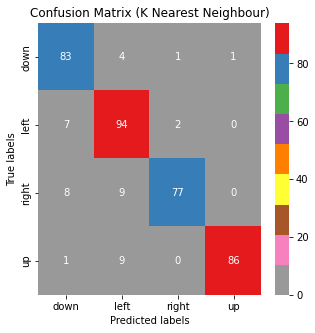

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

print(classification_report(y_test,knn_pred))

acc_knn = float(accuracy_score(y_test,knn_pred))*100
print("----accuracy score %s ----" % acc_knn)

cm_knn = confusion_matrix(y_test,knn_pred)

# plt.figure(figsize=(30,30))
plt.figure(figsize=(5,5))
ax= plt.subplot()
sns.heatmap(cm_knn, annot=True, fmt='g', cmap='Set1_r')

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix (K Nearest Neighbour)'); 
ax.xaxis.set_ticklabels(labels);
ax.yaxis.set_ticklabels(labels);

# Batch - KNN - 100-words